## Librarys

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Case 1 - Journal of Heat Transfer

In [ ]:
# Dados
DirCase1_kpeps = '~/Leandro_2/Unicamp/Extracurriculares/IC_RadiativeTransfer/MineAnalysis/JournalOfHeatTransfer/SimulationsArticleCase1.csv'
DirCase1_epseps = '~/Leandro_2/Unicamp/Extracurriculares/IC_RadiativeTransfer/MineAnalysis/JournalOfHeatTransfer/SimulationCase1-epseps.csv'
DirCase4 = '~/Leandro_2/Unicamp/Extracurriculares/IC_RadiativeTransfer/MineAnalysis/JournalOfHeatTransfer/SimulationCase4(MaybeBroke).csv'

# Carrega-los
DataCase1_kpeps = pd.read_csv(DirCase1_kpeps, skiprows=2, header=None)
DataCase1_epseps = pd.read_csv(DirCase1_epseps, skiprows=2, header=None)
DataCase4 = pd.read_csv(DirCase4, skiprows=2, header=None)

# Nome das colunas
DataCase1_kpeps.columns = ['x', 'T', 'xh2o', 'xco2', 'S', 'qx', 'Xq_SLW1', 'Q_SLW1', 'Xq_SLW', 'Q_SLW', 'Xs_SLW1', 'Ss_SLW1', 'Xs_SLW', 'Ss_SLW']
DataCase1_epseps.columns = ['x', 'T', 'xh2o', 'xco2', 'S_LBL', 'S_SLW', 'S_SLW1', 'q_LBL', 'q_SLW', 'q_SLW1']
DataCase4.columns = ['x', 'T', 'xh2o', 'xco2', 'S', 'qx']

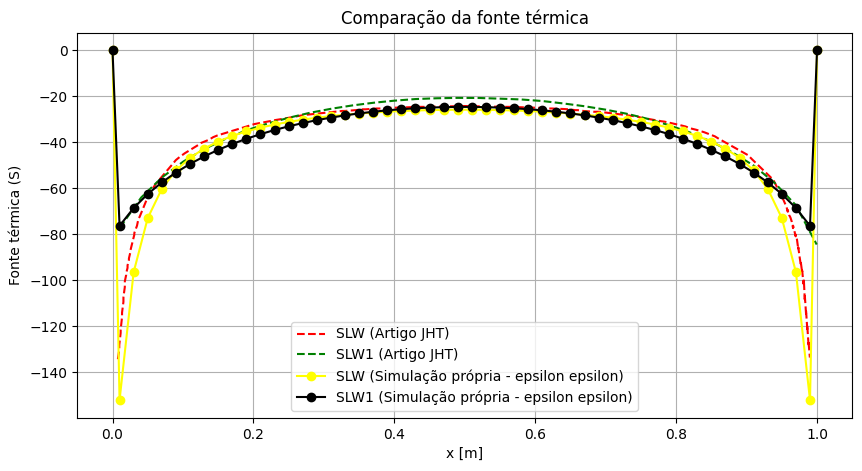

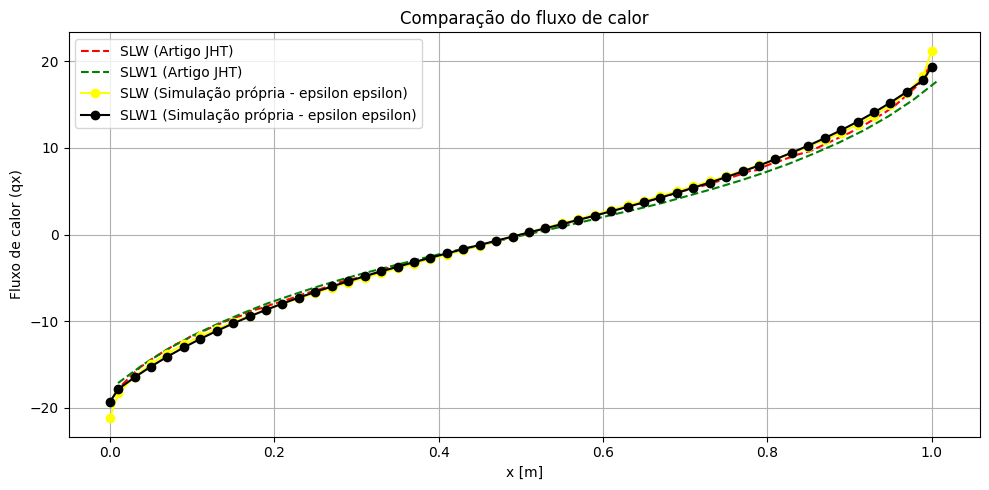

In [22]:
# Analises
plt.figure(figsize=(10, 5))
plt.plot(DataCase1_kpeps['Xs_SLW'], DataCase1_kpeps['Ss_SLW'], '--', label='SLW (Artigo JHT)', color='red')
plt.plot(DataCase1_kpeps['Xs_SLW1'], DataCase1_kpeps['Ss_SLW1'], '--', label='SLW1 (Artigo JHT)', color='green')
plt.plot(DataCase1_epseps['x'], DataCase1_epseps['S_SLW'], '-o', label='SLW (Simulação própria - epsilon epsilon)', color='yellow')
plt.plot(DataCase1_epseps['x'], DataCase1_epseps['S_SLW1'], '-o', label='SLW1 (Simulação própria - epsilon epsilon)', color='black')
plt.xlabel('x [m]')
plt.ylabel('Fonte térmica (S)')
plt.title('Comparação da fonte térmica')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 5))
plt.plot(DataCase1_kpeps['Xq_SLW'], DataCase1_kpeps['Q_SLW'], '--', label='SLW (Artigo JHT)', color='red')
plt.plot(DataCase1_kpeps['Xq_SLW1'], DataCase1_kpeps['Q_SLW1'], '--', label='SLW1 (Artigo JHT)', color='green')
plt.plot(DataCase1_epseps['x'], DataCase1_epseps['q_SLW'], '-o', label='SLW (Simulação própria - epsilon epsilon)', color='yellow')
plt.plot(DataCase1_epseps['x'], DataCase1_epseps['q_SLW1'], '-o', label='SLW1 (Simulação própria - epsilon epsilon)', color='black')

plt.xlabel('x [m]')
plt.ylabel('Fluxo de calor (qx)')
plt.title('Comparação do fluxo de calor')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()